In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# STFT

In [2]:
data1 = pd.read_csv('librosa_Spec', index_col='Unnamed: 0')
data2 = pd.read_csv('Spec_torch', index_col='Unnamed: 0')
data2['Type']='nnAudio'
data3 = pd.read_csv('Spec_torch_GPU', index_col='Unnamed: 0')
data3['Type']='nnAudio GPU'
data = data1.append([data2,data3])

In [3]:
STFT_result_avg = data.groupby('Type').mean()
STFT_result_std = data.groupby('Type').std()

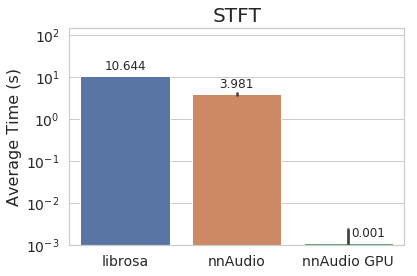

In [4]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Type", y="t_avg", data=data)
plt.title('STFT', size=20)
plt.ylabel('Average Time (s)', size=16)
plt.xlabel('', size=16)
ax.tick_params(labelsize=14)
ax.set_yscale('log')
plt.ylim(1e-3,150)
counter = 0
for p in ax.patches: 
    if counter == 2:
        ax.annotate(format(p.get_height(), '.3f'), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), 
            ha = 'center', va = 'center', xytext = (20, 10), 
            textcoords = 'offset points')
    else:
        ax.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), 
                        textcoords = 'offset points')
    counter+=1

# Mel Spectrogram

In [5]:
data1 = pd.read_csv('librosa_Mel', index_col='Unnamed: 0')
data2 = pd.read_csv('Mel_torch', index_col='Unnamed: 0')
data2['Type']='nnAudio'
data3 = pd.read_csv('Mel_torch_GPU', index_col='Unnamed: 0')
data3['Type']='nnAudio GPU'

In [6]:
data = data1.append([data2,data3])
Mel_result_avg = data.groupby('Type').mean()
Mel_result_std = data.groupby('Type').std()

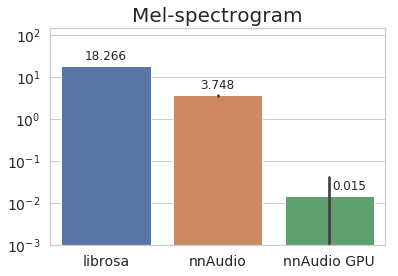

In [7]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Type", y="t_avg", data=data)
plt.title('Mel-spectrogram', size=20)
plt.ylabel('', size=16)
plt.xlabel('', size=16)
ax.tick_params(labelsize=14)
ax.set_yscale('log')
plt.ylim(1e-3,150)
counter = 0
for p in ax.patches: 
    if counter == 2:
        ax.annotate(format(p.get_height(), '.3f'), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), 
            ha = 'center', va = 'center', xytext = (20, 10), 
            textcoords = 'offset points')
    else:
        ax.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), 
                        textcoords = 'offset points')
    counter+=1

# CQT

In [8]:
data1 = pd.read_csv('librosa_CQT', index_col='Unnamed: 0')
data2 = pd.read_csv('CQT_torch', index_col='Unnamed: 0')
data2['Type']='nnAudio'
data3 = pd.read_csv('CQT_torch_GPU', index_col='Unnamed: 0')
data3['Type']='nnAudio GPU'
data = data1.append([data2,data3])
CQT_result_avg = data.groupby('Type').mean()
CQT_result_std = data.groupby('Type').std()

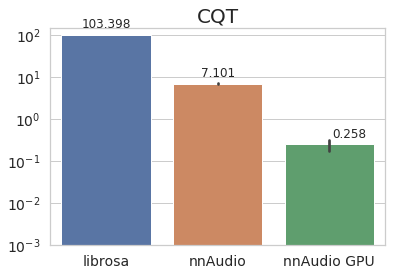

In [9]:
sns.set(style="whitegrid")
ax = sns.barplot(x="Type", y="t_avg", data=data)
plt.title('CQT', size=20)
plt.ylabel('', size=16)
plt.xlabel('', size=16)
ax.tick_params(labelsize=14)
ax.set_yscale('log')
plt.ylim(1e-3,150)
counter = 0
for p in ax.patches: 
    if counter == 2:
        ax.annotate(format(p.get_height(), '.3f'), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), 
            ha = 'center', va = 'center', xytext = (20, 10), 
            textcoords = 'offset points')
    else:
        ax.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                        ha = 'center', va = 'center', xytext = (0, 10), 
                        textcoords = 'offset points')
    counter+=1

# CQT v2

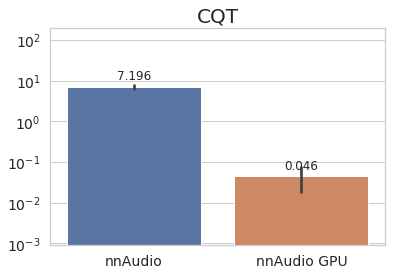

In [10]:
data1 = pd.read_csv('CQT1992_torch', index_col='Unnamed: 0')
data1['Type']='nnAudio'
data2 = pd.read_csv('CQT1992_torch_GPU', index_col='Unnamed: 0')
data2['Type']='nnAudio GPU'
data3 = pd.read_csv('CQT2019_torch', index_col='Unnamed: 0')
data3['Type']='nnAudio'
data4 = pd.read_csv('CQT2019_torch_GPU', index_col='Unnamed: 0')
data4['Type']='nnAudio GPU'
data = data1.append([data2,data3,data4])


sns.set(style="whitegrid")
ax = sns.barplot(x="Type", y="t_avg", data=data)
plt.title('CQT', size=20)
plt.ylabel('', size=16)
plt.xlabel('', size=16)
ax.tick_params(labelsize=14)
ax.set_yscale('log')
plt.ylim(9e-4,200)
counter = 0
for p in ax.patches: 
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), 
                    textcoords = 'offset points')

In [11]:
final_data_avg = STFT_result_avg.append([Mel_result_avg, CQT_result_avg])
grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

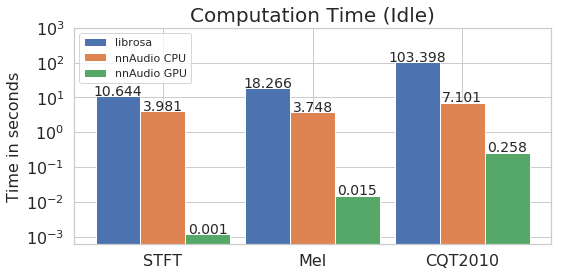

In [12]:
labels = ['STFT', 'Mel', 'CQT2010']
librosa_means = grouped_data_avg.get_group('librosa').values.reshape(-1)
CPU_means = grouped_data_avg.get_group('nnAudio').values.reshape(-1)
GPU_means = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((8,4)))
rects1 = ax.bar(x - width, librosa_means, width, label='librosa')
rects2 = ax.bar(x, CPU_means, width, label='nnAudio CPU')
rects3 = ax.bar(x + width, GPU_means, width, label='nnAudio GPU')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time in seconds', size=16)
ax.set_title('Computation Time (Idle)', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=16)
ax.legend(loc='upper left')
ax.set_yscale('log')
ax.set_ylim(6e-4,1000)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.tick_params(labelsize=16)

fig.tight_layout()

plt.show()

In [13]:
improve_data_avg = data.groupby('Type').mean()
improve_data_std = data.groupby('Type').std()

In [14]:
grouped_data_avg.get_group('nnAudio').values.reshape(-1)

array([3.98096604, 3.74801574, 7.1013422 ])

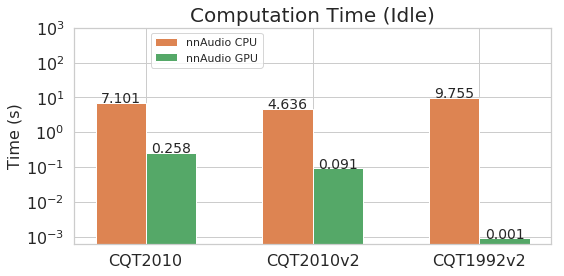

In [15]:
data1 = pd.read_csv('CQT1992_torch', index_col='Unnamed: 0')
data1['Type']='nnAudio'
data2 = pd.read_csv('CQT1992_torch_GPU', index_col='Unnamed: 0')
data2['Type']='nnAudio GPU'
data = data1.append([data2])
CQT1992v2_avg = data.groupby('Type').mean()
CQT1992v2_std = data.groupby('Type').std()

data3 = pd.read_csv('CQT2019_torch', index_col='Unnamed: 0')
data3['Type']='nnAudio'
data4 = pd.read_csv('CQT2019_torch_GPU', index_col='Unnamed: 0')
data4['Type']='nnAudio GPU'
data = data3.append([data4])
CQT2019_result_avg = data.groupby('Type').mean()
CQT2019_result_std = data.groupby('Type').std()


final_data_avg = CQT_result_avg.append([CQT2019_result_avg, CQT1992v2_avg])
final_data_avg.drop('librosa', inplace=True)
grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

labels = ['CQT2010', 'CQT2010v2', 'CQT1992v2']
CPU_means = grouped_data_avg.get_group('nnAudio').values.reshape(-1)
GPU_means = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=((8,4)))
rects2 = ax.bar(x-width/2, CPU_means, width, label='nnAudio CPU', color='C1')
rects3 = ax.bar(x+width/2, GPU_means, width, label='nnAudio GPU', color='C2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (s)', size=16)
ax.set_title('Computation Time (Idle)', size=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, size=16)
ax.legend(loc='upper left', bbox_to_anchor=(0.15, 1))
ax.set_yscale('log')
ax.set_ylim(6e-4,1000)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)


autolabel(rects2)
autolabel(rects3)

ax.tick_params(labelsize=16)

fig.tight_layout()

plt.show()